<a href="https://colab.research.google.com/github/adrianweerasinghe97/SIT719/blob/master/Task_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataSet 1**

In [47]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


import warnings
warnings.filterwarnings('ignore')




In [48]:
!pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=367915eb8776fb26821759dc8e727523e27282e7638c162884a5059162d77692
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [49]:
DataSet

'training_attack_types.txt'

In [50]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']



col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [51]:


category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [52]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [53]:


train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [54]:

test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

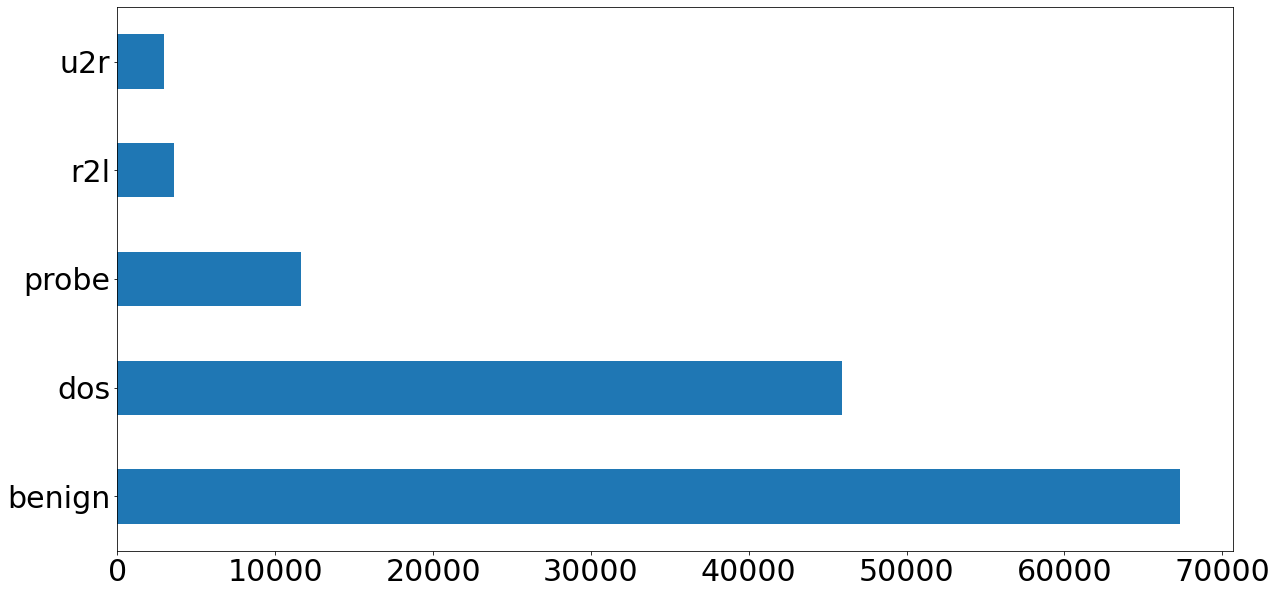

In [55]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()



train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')




train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]


dummy_variables = list(set(train_x)-set(combined_df_raw))


train_x.describe()
train_x['duration'].describe()

from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()


from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()


from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()


from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()



standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


**1. Decision Tree**

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719
0.7621096522356281
[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]


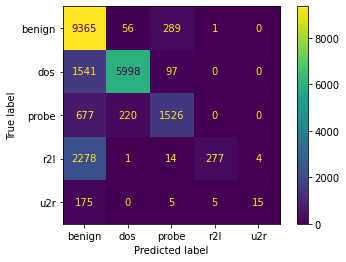

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, classification_report
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)



print(accuracy_score(pred_y, test_Y))
print(confusion_matrix(test_Y, pred_y))

plot_confusion_matrix(classifier, test_x, test_Y)  
plt.show()

**2. Logistic Regression**

[[8993   90  624    2    2]
 [1560 6052   24    0    0]
 [ 496   99 1825    3    0]
 [2471    2    2   99    0]
 [ 184    3    0    5    8]]
0.2469393186657204
0.7530606813342796
[[8993   90  624    2    2]
 [1560 6052   24    0    0]
 [ 496   99 1825    3    0]
 [2471    2    2   99    0]
 [ 184    3    0    5    8]]


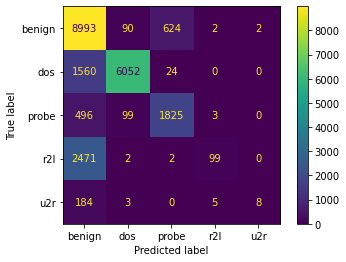

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import accuracy_score


classifier = LogisticRegression(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)


print(accuracy_score(pred_y, test_Y))
print(confusion_matrix(test_Y, pred_y))

plot_confusion_matrix(classifier, test_x, test_Y)  
plt.show()

**3. Naive Bayes**

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[[9051  439  207   13    1]
 [2208 5340   88    0    0]
 [ 207  305 1911    0    0]
 [2041   12   48  469    4]
 [  60   98   15    3   24]]
0.2550124201561391
0.7449875798438609
[[9051  439  207   13    1]
 [2208 5340   88    0    0]
 [ 207  305 1911    0    0]
 [2041   12   48  469    4]
 [  60   98   15    3   24]]


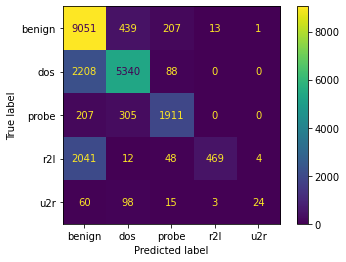

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

classifier = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

print(accuracy_score(pred_y, test_Y))
print(confusion_matrix(test_Y, pred_y))


plot_confusion_matrix(classifier, test_x, test_Y)  
plt.show()

4. SVM-SVC

[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
0.5053672817601136
0.7584279630943932
[[9040  225  437    4    5]
 [1445 6179   12    0    0]
 [ 720  115 1588    0    0]
 [2291    1    2  275    5]
 [ 180    1    0    3   16]]


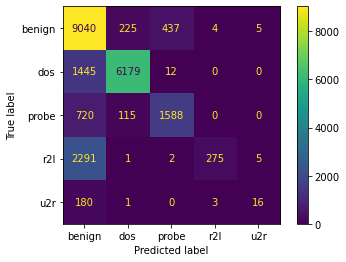

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import accuracy_score

classifier = SVC(kernel='linear') 
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

print(results)
print(error)



print(accuracy_score(pred_y, test_Y))
print(confusion_matrix(test_Y, pred_y))


plot_confusion_matrix(classifier, test_x, test_Y)  
plt.show()

**5.  Multi-layer Perceptron**

[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
0.5053672817601136
0.767388218594748
[[9192   52  459    5    3]
 [1399 6149   87    1    0]
 [ 402  447 1565    9    0]
 [2150    0   18  378   28]
 [ 101    0   72   11   16]]


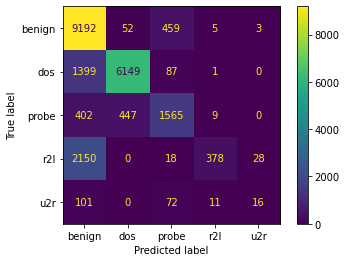

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import accuracy_score



classifier = MLPClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)


print(results)
print(error)

print(accuracy_score(pred_y, test_Y))
print(confusion_matrix(test_Y, pred_y))


plot_confusion_matrix(classifier, test_x, test_Y)  
plt.show()

**DataSet 2**

In [20]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [21]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

import io

dataset = pd.read_csv(io.BytesIO(uploaded['Processed_Combined_IoT_dataset.csv']))

Saving Processed_Combined_IoT_dataset.csv to Processed_Combined_IoT_dataset (1).csv


In [22]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [23]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [24]:
print(dataset.shape)

(401119, 18)


In [25]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [26]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [27]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

In [28]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [29]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [31]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [32]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**1. Random Forest**

In [18]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(criterion='gini', n_estimators=100, random_state=10,n_jobs=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [19]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start


In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69923  3572]
 [12095 34746]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [21]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8698062092806808
Precision: 0.9067801033456862
Recall: 0.7417860421425674
F1 Score: 0.8160264916215548
Mean Absolute Error: 0.13019379071931925
Cohens kappa: 0.7168356982387822
ROC AUC: 0.8465920482159874
Train Time(s):  53.358119461000115
Test Time(s):  4.533775234000132


**2. Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier


#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=DecisionTreeClassifier(criterion="gini", random_state=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [40]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start


In [41]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69364  4131]
 [12116 34725]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     73495
           1       0.89      0.74      0.81     46841

    accuracy                           0.86    120336
   macro avg       0.87      0.84      0.85    120336
weighted avg       0.87      0.86      0.86    120336



In [42]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8649863714931525
Precision: 0.8936843730697962
Recall: 0.7413377169573664
F1 Score: 0.8104134333757307
Mean Absolute Error: 0.1350136285068475
Cohens kappa: 0.7069839101396478
ROC AUC: 0.8425649058288431
Train Time(s):  2.529027636999672
Test Time(s):  0.050669100000050094


**3. KNN**

In [43]:
from sklearn.neighbors import KNeighborsClassifier


#Calculate start time
start = timeit.default_timer()

# n_neighbors=3

#Create a Gaussian Classifier
clf=KNeighborsClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [44]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start


In [45]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[68291  5204]
 [14867 31974]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     73495
           1       0.86      0.68      0.76     46841

    accuracy                           0.83    120336
   macro avg       0.84      0.81      0.82    120336
weighted avg       0.84      0.83      0.83    120336



In [46]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8332086823560697
Precision: 0.860024745817419
Recall: 0.6826071176960355
F1 Score: 0.761113557647675
Mean Absolute Error: 0.16679131764393032
Cohens kappa: 0.6355749447842287
ROC AUC: 0.8058997898841427
Train Time(s):  0.04398704599952907
Test Time(s):  695.0578123429996


**4. Logistic Regression**

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns

param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']   
}

#Calculate start time
start = timeit.default_timer()

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1000), param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)
logModel_grid.fit(X_train,y_train)


#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [87]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=logModel_grid.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [88]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[66080  7415]
 [27461 19380]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79     73495
           1       0.72      0.41      0.53     46841

    accuracy                           0.71    120336
   macro avg       0.71      0.66      0.66    120336
weighted avg       0.71      0.71      0.69    120336



In [89]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.7101781677968355
Precision: 0.7232692666542265
Recall: 0.41374009948549345
F1 Score: 0.5263729697430604
Mean Absolute Error: 0.2898218322031645
Cohens kappa: 0.3391692954552139
ROC AUC: 0.6564244411979477
Train Time(s):  412.28292220799995
Test Time(s):  0.017896334999022656


**5. SVM**

In [15]:
from sklearn.svm import SVC

#Calculate start time
start = timeit.default_timer()

# n_neighbors=3

#Create a Gaussian Classifier
clf=SVC()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [17]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [18]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[71860  1635]
 [24213 22628]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85     73495
           1       0.93      0.48      0.64     46841

    accuracy                           0.79    120336
   macro avg       0.84      0.73      0.74    120336
weighted avg       0.82      0.79      0.77    120336



In [19]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.7852014359792581
Precision: 0.9326134443391172
Recall: 0.48308106146324803
F1 Score: 0.6364761476147616
Mean Absolute Error: 0.21479856402074193
Cohens kappa: 0.50497143856802
ROC AUC: 0.7304173250713751
Train Time(s):  11982.571006619999
Test Time(s):  958.6865445790008


**6. Adaboost**

In [34]:
from sklearn.ensemble import AdaBoostClassifier


#Calculate start time
start = timeit.default_timer()

# n_neighbors=3

#Create a Gaussian Classifier
clf=AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [35]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [36]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[70569  2926]
 [21168 25673]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     73495
           1       0.90      0.55      0.68     46841

    accuracy                           0.80    120336
   macro avg       0.83      0.75      0.77    120336
weighted avg       0.82      0.80      0.79    120336



In [45]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.7997772902539556
Precision: 0.8976887303751879
Recall: 0.5480882133173929
F1 Score: 0.6806203605514315
Mean Absolute Error: 0.20022270974604442
Cohens kappa: 0.5468972594661179
ROC AUC: 0.7541379905963793
Train Time(s):  8.968062264000764
Test Time(s):  0.8733976540024742


**Naive Bayes**

In [60]:
from sklearn.naive_bayes import GaussianNB

#Calculate start time
start = timeit.default_timer()

# n_neighbors=3

#Create a Gaussian Classifier
clf=GaussianNB()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [61]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [62]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[68740  4755]
 [31360 15481]]
              precision    recall  f1-score   support

           0       0.69      0.94      0.79     73495
           1       0.77      0.33      0.46     46841

    accuracy                           0.70    120336
   macro avg       0.73      0.63      0.63    120336
weighted avg       0.72      0.70      0.66    120336



In [64]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.6998819970748571
Precision: 0.765022731765171
Recall: 0.330501056766508
F1 Score: 0.46158892019619235
Mean Absolute Error: 0.30011800292514296
Cohens kappa: 0.2963221681287075
ROC AUC: 0.632901388986016
Train Time(s):  0.11553382499914733
Test Time(s):  0.026248005997331347


**8. MLP**

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import accuracy_score



#Calculate start time
start = timeit.default_timer()

# n_neighbors=3

#Create a Gaussian Classifier
clf=MLPClassifier(random_state=17)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [67]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [68]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[71004  2491]
 [20987 25854]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     73495
           1       0.91      0.55      0.69     46841

    accuracy                           0.80    120336
   macro avg       0.84      0.76      0.77    120336
weighted avg       0.83      0.80      0.79    120336



In [69]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8048962903869167
Precision: 0.9121185394249427
Recall: 0.5519523494374586
F1 Score: 0.6877344186417683
Mean Absolute Error: 0.19510370961308338
Cohens kappa: 0.5580139006166511
ROC AUC: 0.7590294436485884
Train Time(s):  156.58181299900025
Test Time(s):  0.1123139839983196
